<a href="https://colab.research.google.com/github/mikeyarconi/NEIPR_Fractal_Ellipses/blob/main/neipr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title #Dependencies
!pip install numpy matplotlib ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.4 MB/s eta 0:00:00


In [ ]:
# @title #Standard Ellipse

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown, Checkbox, VBox, HTML

def plot_ellipse(a, b, color='blue', show_axes=True, show_grid=True):
    """
    Plots an ellipse with customizable parameters and displays key properties
    """
    plt.close('all')  # Clean up previous plots

    if b >= a:
        display(HTML("<span style='color:red'>Error: b must be < a</span>"))
        return

    # Calculate ellipse properties
    c = np.sqrt(a**2 - b**2)
    eccentricity = c/a
    area = np.pi * a * b

    # Create plot
    fig, ax = plt.subplots(figsize=(8, 6))
    theta = np.linspace(0, 2*np.pi, 1000)
    ax.plot(a*np.cos(theta), b*np.sin(theta), color=color, lw=2)
    ax.scatter([-c, c], [0, 0], color='red', zorder=3)

    # Configure plot appearance
    ax.set_aspect('equal')
    ax.set_title(f"Ellipse (a={a}, b={b})", pad=20)
    if show_axes: ax.axhline(0, color='#666666', lw=0.5), ax.axvline(0, color='#666666', lw=0.5)
    ax.grid(show_grid, alpha=0.3)

    plt.show()

    # Display formatted properties
    display(HTML(
        f"<b>Ellipse Properties:</b><br>"
        f"Semi-major axis: {a:.2f}<br>"
        f"Semi-minor axis: {b:.2f}<br>"
        f"Linear eccentricity: {c:.2f}<br>"
        f"Eccentricity: {eccentricity:.3f}<br>"
        f"Area: {area:.2f}"
    ))

# Widget configurations
a_slider = FloatSlider(value=5, min=1.1, max=15, step=0.1, description='Major axis (a):')
b_slider = FloatSlider(value=3, min=1.0, max=14, step=0.1, description='Minor axis (b):')
color_picker = Dropdown(options=['blue', 'green', 'purple', 'orange'], description='Color:')
axes_check = Checkbox(value=True, description='Show axes')
grid_check = Checkbox(value=True, description='Show grid')

# Widget layout
ui = VBox([
    a_slider,
    b_slider,
    VBox([color_picker, axes_check, grid_check],
         layout={'border': '1px solid gray', 'padding': '8px'})
])

@interact(
    a=a_slider,
    b=b_slider,
    color=color_picker,
    show_axes=axes_check,
    show_grid=grid_check
)
def update(a, b, color, show_axes, show_grid):
    """Handles widget changes and updates visualization"""
    plot_ellipse(a, b, color, show_axes, show_grid)


interactive(children=(FloatSlider(value=5.0, description='Major axis (a):', max=15.0, min=1.1), FloatSlider(va…

In [ ]:
# @title #Scale Factor 'K'
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox, Button, interactive_output

def generate_ellipse(center, a, b, theta):
    """Generate ellipse coordinates"""
    x = center[0] + a * np.cos(theta)
    y = center[1] + b * np.sin(theta)
    return x, y

def calculate_foci(center, a, b):
    """Calculate ellipse foci coordinates"""
    if a < b:
        raise ValueError("Semi-major axis (a) must be greater than semi-minor axis (b)")
    c = np.sqrt(a**2 - b**2)
    return (center[0] - c, center[1]), (center[0] + c, center[1])

def plot_ellipses(a, b, scale_factor):
    """Main plotting function with error handling"""
    try:
        if a < b:
            raise ValueError("a must be ≥ b")

        theta = np.linspace(0, 2*np.pi, 500)
        center = (0, 0)
        focus1, focus2 = calculate_foci(center, a, b)

        # Main ellipse
        x_main, y_main = generate_ellipse(center, a, b, theta)

        # Scaled ellipse calculations
        c = np.sqrt(a**2 - b**2)
        auto_scale = (a - c)/a  # Correct scaling factor formula

        # Scaled ellipse at focus1
        x_scaled, y_scaled = generate_ellipse(focus1, a*scale_factor, b*scale_factor, theta)

        plt.figure(figsize=(8, 6))
        plt.plot(x_main, y_main, 'b', label=f'Main Ellipse (a={a}, b={b})')
        plt.plot(x_scaled, y_scaled, 'orange',
                label=f'Scaled Ellipse (K={scale_factor:.2f})')
        plt.scatter(*focus1, c='red', label='Focus 1')
        plt.scatter(*focus2, c='green', label='Focus 2')

        plt.title('Ellipse Scaling at Focus')
        plt.axis('equal')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"Auto-calculated scale factor: {auto_scale:.2f}")

    except Exception as e:
        print(f"Error: {str(e)}")

def interactive_plot():
    """Create interactive widget layout"""
    # Create widgets
    a_slider = FloatSlider(value=5.0, min=1.0, max=10.0, step=0.1,
                          description='Semi-major (a):')
    b_slider = FloatSlider(value=3.0, min=1.0, max=a_slider.value, step=0.1,
                          description='Semi-minor (b):')
    scale_slider = FloatSlider(value=0.5, min=0.1, max=1.0, step=0.01,
                              description='Scale Factor:')
    auto_btn = Button(description='Auto Scale')

    # Link b_slider max to a_slider value
    def update_b_range(change):
        b_slider.max = change.new
    a_slider.observe(update_b_range, names='value')

    # Auto-scale functionality
    def update_scale(btn):
        c = np.sqrt(a_slider.value**2 - b_slider.value**2)
        new_scale = (a_slider.value - c)/a_slider.value
        scale_slider.value = max(min(new_scale, scale_slider.max), scale_slider.min)

    auto_btn.on_click(update_scale)

    # Create interactive output
    out = interactive_output(plot_ellipses, {
        'a': a_slider,
        'b': b_slider,
        'scale_factor': scale_slider
    })

    # Arrange components
    display(VBox([
        a_slider,
        b_slider,
        scale_slider,
        auto_btn
    ]))
    display(out)

# Start the interactive plot
interactive_plot()


Output()


🔍 Test Case 1 Parameters:
Center: (3.5, 0.0)
Semi-Major Axis (a): 4
Semi-Minor Axis (b): 3.0000
Foci: (1, 0) and (6, 0)
Linear Eccentricity (c): 2.5000
Rotation Angle: 0 degrees
🧮 Scaling Factor K via Algebraic Method: 0.375
📏 Scaled Ellipse E1_a: Center=(1, 0), a'=1.5000, b'=1.1250, Rotation Angle=0 degrees
📍 Point of Tangency: (-0.5, -9.64873589805982e-16)
📐 Shared Tangent Line: Vertical


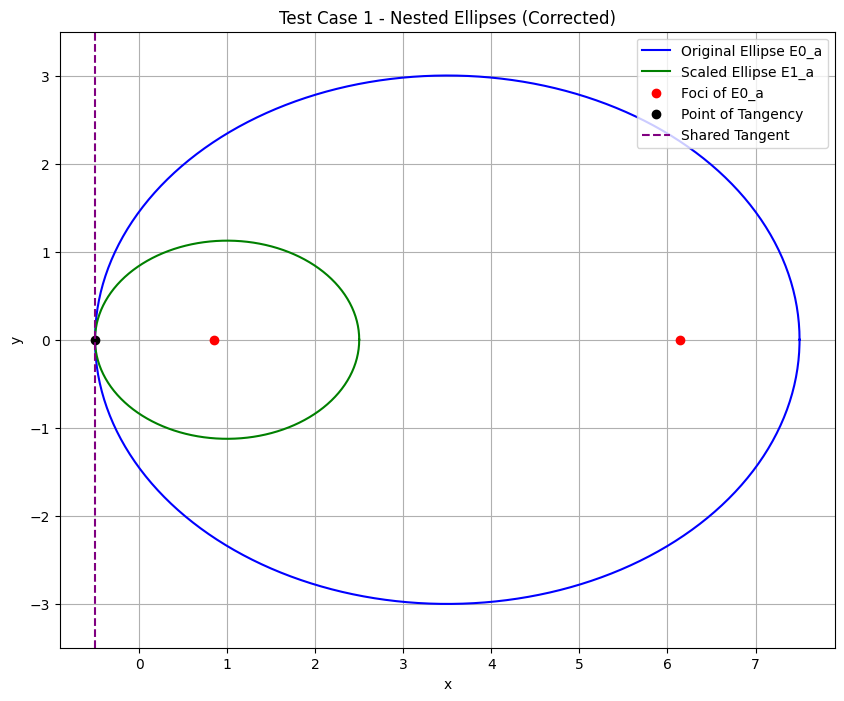


🔍 Test Case 2 Parameters:
Center: (0.0, 2.5)
Semi-Major Axis (a): 5
Semi-Minor Axis (b): 2.0000
Foci: (0, 1) and (0, 4)
Linear Eccentricity (c): 1.5000
Rotation Angle: 90 degrees
🧮 Scaling Factor K via Algebraic Method: 0.7
📏 Scaled Ellipse E1_a: Center=(0, 1), a'=3.5000, b'=1.4000, Rotation Angle=90 degrees
📍 Point of Tangency: (-2.3274478990165594e-15, -2.5)
📐 Shared Tangent Line: Horizontal


<ipython-input-39-056da19bfd39>:95: RuntimeWarning: invalid value encountered in sqrt
  c0 = np.sqrt(b0**2 - a0**2)


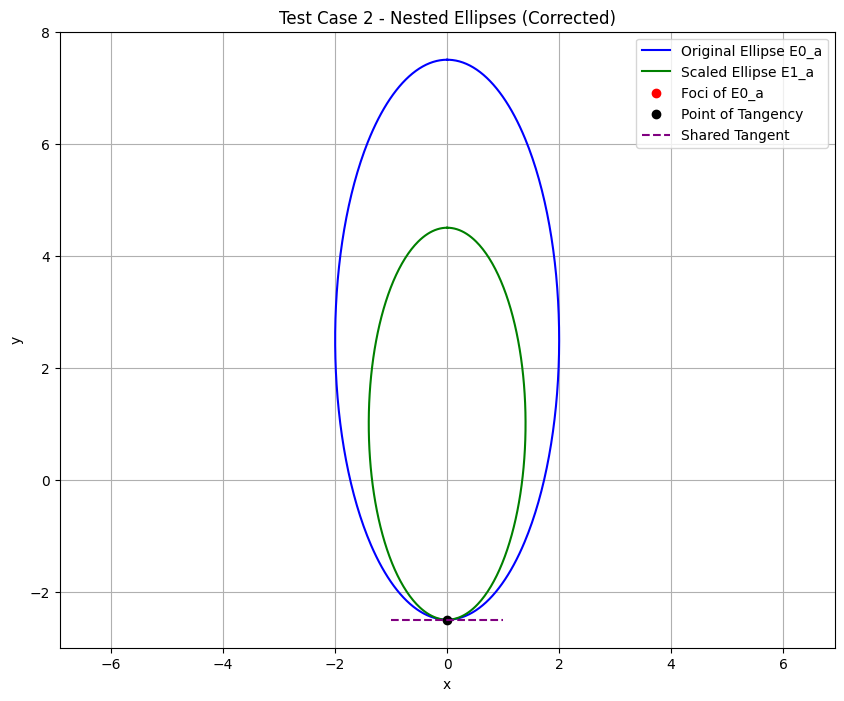


🔍 Test Case 3 Parameters:
Center: (3.5, 3.0)
Semi-Major Axis (a): 3
Semi-Minor Axis (b): 1.5000
Foci: (2, 3) and (5, 3)
Linear Eccentricity (c): 1.5000
Rotation Angle: 0 degrees
🧮 Scaling Factor K via Algebraic Method: 0.5
📏 Scaled Ellipse E1_a: Center=(2, 3), a'=1.5000, b'=0.7500, Rotation Angle=0 degrees
📍 Point of Tangency: (0.5, 3.000000000000001)
📐 Shared Tangent Line: Vertical


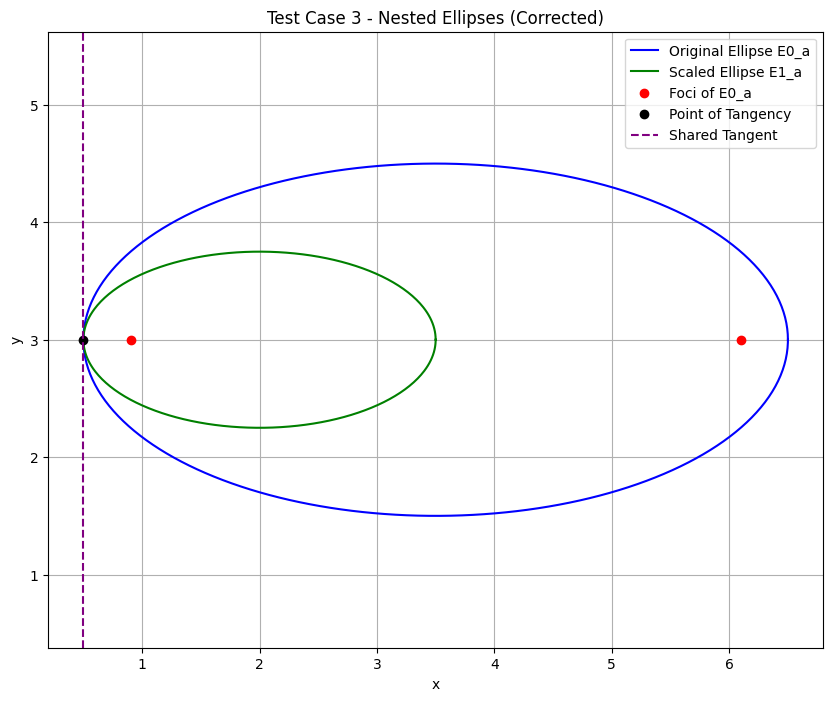


🔍 Test Case 4 Parameters:
Center: (0.5, 0.5)
Semi-Major Axis (a): 5
Semi-Minor Axis (b): 4.0000
Foci: (-2, -1) and (3, 2)
Linear Eccentricity (c): 2.9155
Rotation Angle: 45 degrees
🧮 Scaling Factor K via Algebraic Method: 0.40685364157090764
📏 Scaled Ellipse E1_a: Center=(-2, -1), a'=2.0343, b'=1.6274, Rotation Angle=45 degrees
📍 Point of Tangency: (-3.9039833666084465, -1.492246833586593)
📐 Shared Tangent Line Slope: -1.6667


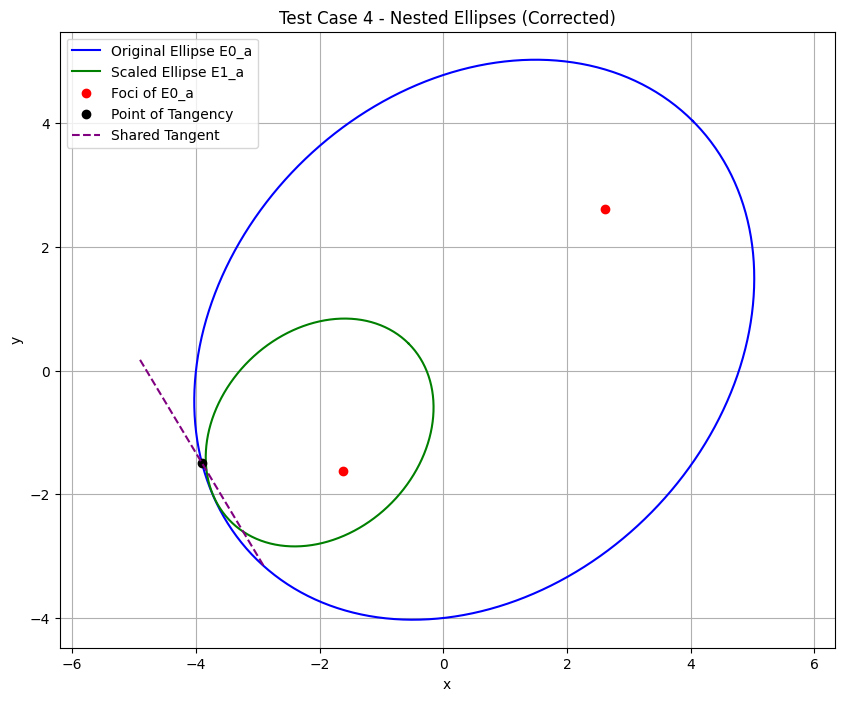


🔍 Test Case 5 Parameters:
Center: (-0.5, -1.5)
Semi-Major Axis (a): 3
Semi-Minor Axis (b): 1.0000
Foci: (-2, -3) and (1, 0)
Linear Eccentricity (c): 2.1213
Rotation Angle: 135 degrees
🧮 Scaling Factor K via Algebraic Method: 3.1213203435243364
📏 Scaled Ellipse E1_a: Center=(-2, -3), a'=9.3640, b'=3.1213, Rotation Angle=135 degrees
📍 Point of Tangency: (0.20711049105232132, -0.792896928681389)
📐 Shared Tangent Line Slope: -1.0000


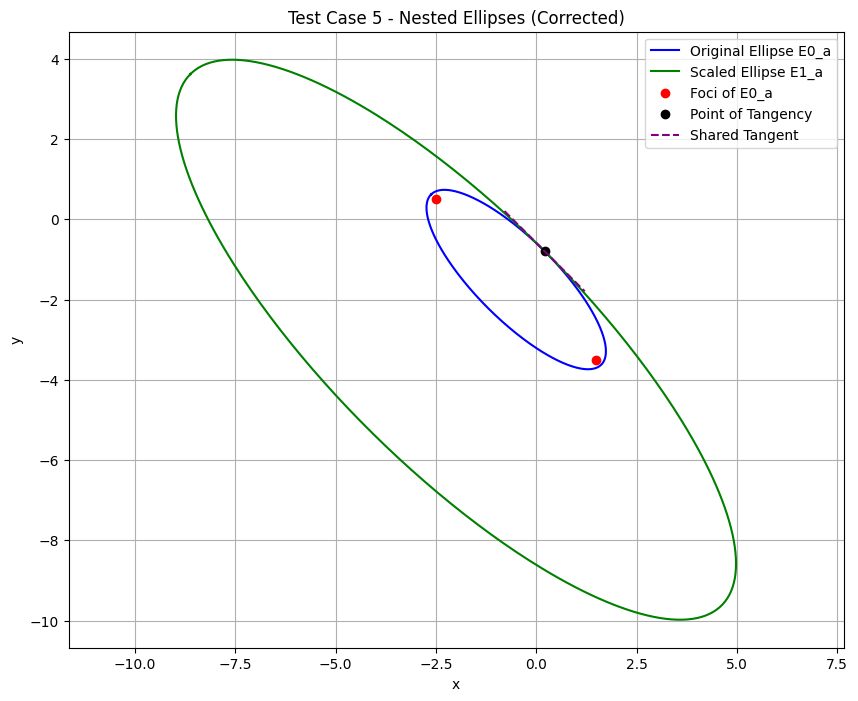


🔍 Test Case 6 Parameters:
Center: (0.25, 0.0)
Semi-Major Axis (a): 4
Semi-Minor Axis (b): 3.8000
Foci: (0, 0) and (0.5, 0)
Linear Eccentricity (c): 0.2500
Rotation Angle: 0 degrees
🧮 Scaling Factor K via Algebraic Method: 0.9375
📏 Scaled Ellipse E1_a: Center=(0, 0), a'=3.7500, b'=3.5625, Rotation Angle=0 degrees
📍 Point of Tangency: (-3.75, 5.527982775966708e-15)
📐 Shared Tangent Line: Vertical


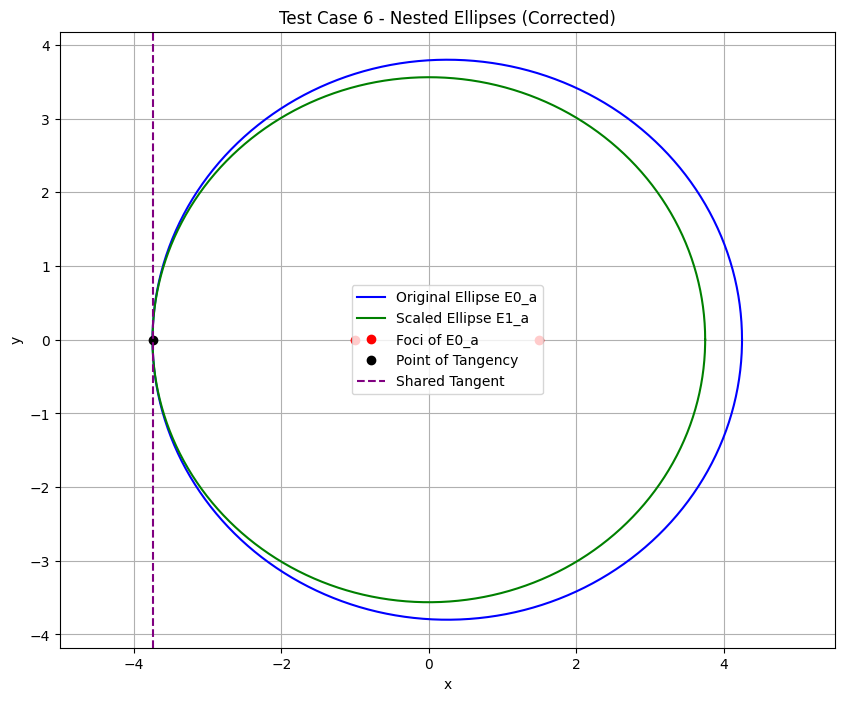


🔄 All test cases completed.


In [39]:
# @title #Scaling Transformed Ellipses to Meet at the Same Tangent Line
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify, cos, sin, sqrt
import sympy as sp  # For symbolic calculations
from scipy.optimize import minimize_scalar  # For numerical minimization

def algebraic_method(h, k, x_f1, y_f1, a, b, angle):
    """
    Derives K and the point of tangency using distance minimization.
    """
    theta = symbols('theta', real=True)  # Use a symbolic variable for the angle

    # --- Parametric equations of the *rotated* original ellipse (E0_a) ---
    rad = np.deg2rad(angle)
    x_rot = h + a * cos(theta) * sp.cos(rad) - b * sin(theta) * sp.sin(rad)
    y_rot = k + a * cos(theta) * sp.sin(rad) + b * sin(theta) * sp.cos(rad)

    # --- Squared distance to the center of the scaled ellipse (F1) ---
    dist_sq = (x_rot - x_f1)**2 + (y_rot - y_f1)**2

    # --- Derivative of the squared distance with respect to theta ---
    dist_sq_diff = diff(dist_sq, theta)

    # --- Convert the symbolic derivative to a numerical function ---
    f_num = lambdify(theta, dist_sq_diff, 'numpy')

    # --- Numerical minimization to find the optimal theta ---
    # Use a robust numerical solver (minimize_scalar) from SciPy
    result = minimize_scalar(lambda t: abs(f_num(t)), bounds=(0, 2 * np.pi), method='bounded')
    theta_opt = result.x

    # --- Get the point of tangency (x, y) ---
    x_opt = float(x_rot.subs(theta, theta_opt))  # Substitute theta_opt and convert to float
    y_opt = float(y_rot.subs(theta, theta_opt))
    P = (x_opt, y_opt)
    # --- Calculate K ---
    # K is the ratio of the distance from F1 to P and distance from the center to point of tangency on E0
    rotated_ellipse_x =  h + a * np.cos(theta_opt) * np.cos(rad) - b * np.sin(theta_opt) * np.sin(rad)
    rotated_ellipse_y =  k + a * np.cos(theta_opt) * np.sin(rad) + b * np.sin(theta_opt) * np.cos(rad)

    dist_f1_p = np.sqrt((x_opt - x_f1)**2 + (y_opt - y_f1)**2)
    dist_center_rotated = np.sqrt((rotated_ellipse_x - h)**2 + (rotated_ellipse_y - k)**2)

    K = dist_f1_p / dist_center_rotated


    return K, P

def parametric_method_generalized(h, k, x_f1, y_f1, a, b):
    """Derive scaling factor K using the Generalized Parametric Method."""
    delta_x = h - x_f1
    delta_y = k - y_f1
    term = (delta_x / a)**2 + (delta_y / b)**2
    return 0 if term > 1 else 1 - np.sqrt(term)

def geometric_method(a, c):
    """Derive scaling factor K using the Geometric Method."""
    return 1 - (c / a)

def plot_ellipses(h0, k0, a0, b0, angle0, h1, k1, a1, b1, angle1, P, tangent_slope, title="Nested Ellipses"):
    """Plot the original and scaled ellipses."""
    theta = np.linspace(0, 2*np.pi, 400)

    x0 = a0 * np.cos(theta)
    y0 = b0 * np.sin(theta)
    if angle0 != 0:
        rad = np.deg2rad(angle0)
        x0_rot = x0 * np.cos(rad) - y0 * np.sin(rad) + h0
        y0_rot = x0 * np.sin(rad) + y0 * np.cos(rad) + k0
        x0, y0 = x0_rot, y0_rot
    else:
        x0 += h0
        y0 += k0

    x1 = a1 * np.cos(theta)
    y1 = b1 * np.sin(theta)
    if angle1 != 0:
        rad = np.deg2rad(angle1)
        x1_rot = x1 * np.cos(rad) - y1 * np.sin(rad) + h1
        y1_rot = x1 * np.sin(rad) + y1 * np.cos(rad) + k1
        x1, y1 = x1_rot, y1_rot
    else:
        x1 += h1
        y1 += k1

    plt.figure(figsize=(10, 8))
    plt.plot(x0, y0, label='Original Ellipse E0_a', color='blue')
    plt.plot(x1, y1, label='Scaled Ellipse E1_a', color='green')

    if angle0 % 180 == 0:
        c0 = np.sqrt(a0**2 - b0**2)
        F1 = (h0 + c0, k0)
        F2 = (h0 - c0, k0)
    elif angle0 % 180 == 90:
        c0 = np.sqrt(b0**2 - a0**2)
        F1 = (h0, k0 + c0)
        F2 = (h0, k0 - c0)
    else:
        rad = np.deg2rad(angle0)
        c0 = np.sqrt(a0**2 - b0**2)
        F1 = (h0 + c0 * np.cos(rad), k0 + c0 * np.sin(rad))
        F2 = (h0 - c0 * np.cos(rad), k0 - c0 * np.sin(rad))

    plt.plot(F1[0], F1[1], 'ro', label='Foci of E0_a')
    plt.plot(F2[0], F2[1], 'ro')

    plt.plot(P[0], P[1], 'ko', label='Point of Tangency')

    if np.isinf(tangent_slope):
        plt.axvline(x=P[0], color='purple', linestyle='--', label='Shared Tangent')
    else:
        x_vals = np.linspace(P[0] - 1, P[0] + 1, 400)
        y_vals = tangent_slope * (x_vals - P[0]) + P[1]
        plt.plot(x_vals, y_vals, 'purple', linestyle='--', label='Shared Tangent')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

def main():
    test_cases = [
        {'name': 'Test Case 1', 'foci': [(1,0), (6,0)], 'a': 4, 'b': 3, 'angle': 0},
        {'name': 'Test Case 2', 'foci': [(0,1), (0,4)], 'a': 5, 'b': 2, 'angle': 90},
        {'name': 'Test Case 3', 'foci': [(2,3), (5,3)], 'a': 3, 'b': 1.5, 'angle': 0},
        {'name': 'Test Case 4', 'foci': [(-2,-1), (3,2)], 'a': 5, 'b': 4, 'angle': 45},

        {'name': 'Test Case 5', 'foci': [(-2,-3), (1,0)], 'a': 3, 'b': 1, 'angle': 135},
        {'name': 'Test Case 6', 'foci': [(0,0), (0.5,0)], 'a': 4, 'b': 3.8, 'angle': 0}
    ]

    for test in test_cases:
        print("\n========================================")
        print(f"🔍 {test['name']} Parameters:")
        f1, f2 = test['foci']
        x_f1, y_f1 = f1
        x_f2, y_f2 = f2
        h0 = (x_f1 + x_f2) / 2
        k0 = (y_f1 + y_f2) / 2
        a0 = test['a']
        b0 = test['b']
        angle0 = test['angle']
        c0 = np.sqrt((x_f2 - h0)**2 + (y_f2 - k0)**2)
        if a0 < c0:
            print("⚠️ Invalid Ellipse: Semi-major axis a is less than linear eccentricity c.")
            continue

        print(f"Center: ({h0}, {k0})")
        print(f"Semi-Major Axis (a): {a0}")
        print(f"Semi-Minor Axis (b): {b0:.4f}")
        print(f"Foci: ({x_f1}, {y_f1}) and ({x_f2}, {y_f2})")
        print(f"Linear Eccentricity (c): {c0:.4f}")
        print(f"Rotation Angle: {angle0} degrees")

        K_algebraic, P = algebraic_method(h0, k0, x_f1, y_f1, a0, b0, angle0)

        if K_algebraic is None:
            print("❌ No valid solution for K found with the algebraic method.")
            continue
        print(f"🧮 Scaling Factor K via Algebraic Method: {K_algebraic}")

        h1, k1 = x_f1, y_f1
        a1, b1 = K_algebraic * a0, K_algebraic * b0
        angle1 = angle0

        print(f"📏 Scaled Ellipse E1_a: Center=({h1}, {k1}), a'={a1:.4f}, b'={b1:.4f}, Rotation Angle={angle1} degrees")

        delta_x = h0 - x_f1
        delta_y = k0 - y_f1
        if delta_x == 0 and delta_y != 0:
            tangent_slope = 0
        elif delta_y == 0 and delta_x !=0:
            tangent_slope = np.inf
        elif delta_x == 0 and delta_y == 0:
            tangent_slope = np.inf
        else:
             tangent_slope = -1/(delta_y/delta_x)

        print(f"📍 Point of Tangency: {P}")
        if np.isinf(tangent_slope):
            print("📐 Shared Tangent Line: Vertical")
        elif tangent_slope == 0:
            print("📐 Shared Tangent Line: Horizontal")
        else:
             print(f"📐 Shared Tangent Line Slope: {tangent_slope:.4f}")

        plot_title = f"{test['name']} - Nested Ellipses (Corrected)"
        plot_ellipses(h0, k0, a0, b0, angle0, h1, k1, a1, b1, angle1, P, tangent_slope, title=plot_title)

    print("\n🔄 All test cases completed.")

if __name__ == "__main__":
    main()

===== Original Ellipse e0_a Parameters =====
Center: (3.5, 0)
Semi-Major Axis (a): 4
Semi-Minor Axis (b): 3.1225
Foci: (1, 0) and (6, 0)

===== Algebraic Method =====
Derived Scaling Factor K: 3/8 = 3/8
Expected Scaling Factor K: 3/8 = 0.375
Algebraic Method correctly derives K = 3/8 with exactly one intersection point.

===== Parametric Method =====
Derived Scaling Factor K: 0.375 = 3/8
Expected Scaling Factor K: 3/8 = 0.375
Parametric Method correctly derives K = 3/8 with intersection point at (-0.5, 1.4339844017662924e-16).

===== Geometric Method =====
Derived Scaling Factor K: 0.375 = 0.375
Expected Scaling Factor K: 3/8 = 0.375
Geometric Method correctly derives K = 3/8.

All methods correctly derive the same scaling factor K = 0.375.



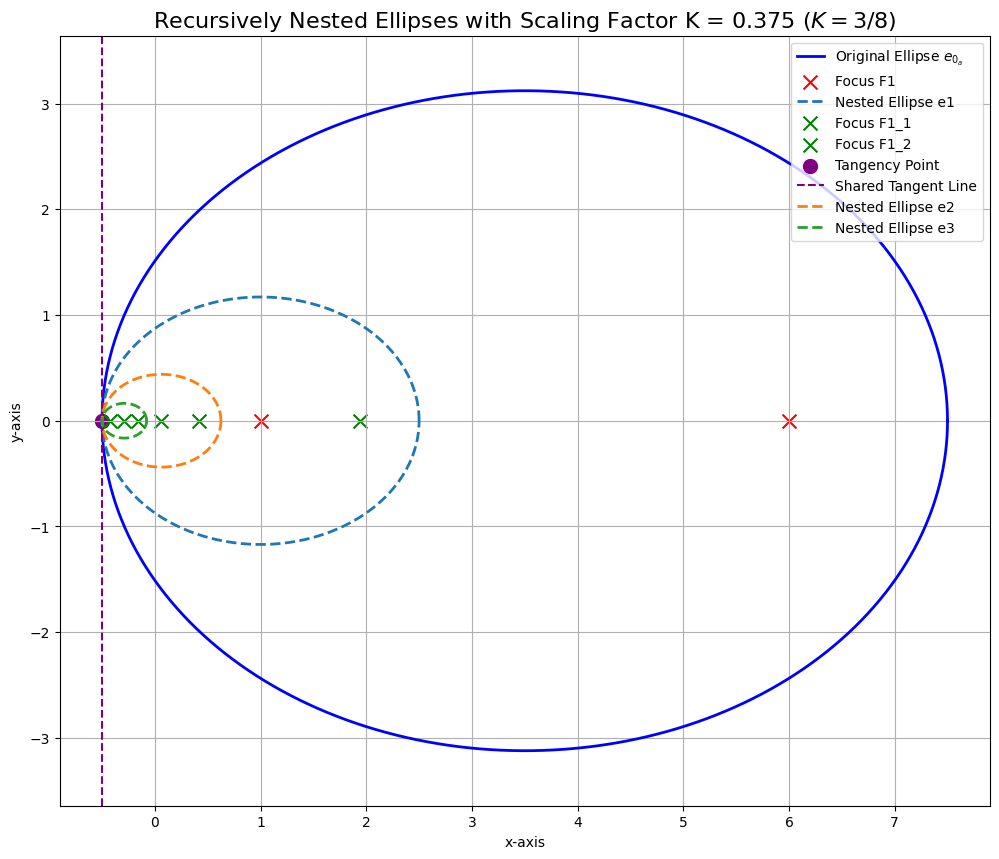

In [ ]:
# @title #Scaling to Multiple Recursions

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.solvers import solve
from sympy import Eq, symbols, cos, sin, pi, simplify, S

# Step 1: Define the Original Ellipse e0_a
def define_original_ellipse():
    h0, k0 = 3.5, 0          # Center at (3.5, 0)
    a = 4                     # Semi-major axis
    c = 2.5                   # Linear eccentricity
    b = np.sqrt(a**2 - c**2) # Semi-minor axis ≈3.122

    print("===== Original Ellipse e0_a Parameters =====")
    print(f"Center: ({h0}, {k0})")
    print(f"Semi-Major Axis (a): {a}")
    print(f"Semi-Minor Axis (b): {b:.4f}")
    print(f"Foci: (1, 0) and (6, 0)\n")

    return {'h': h0, 'k': k0, 'a': a, 'b': b, 'foci': [(1, 0), (6, 0)]}

# Step 2: Implement Algebraic Method
def algebraic_method(e0):
    # Define symbols
    x, y, K = symbols('x y K', real=True)

    # Original ellipse E0
    eq1 = Eq( ((x - e0['h'])**2) / e0['a']**2 + ((y - e0['k'])**2) / e0['b']**2, 1 )

    # Scaled ellipse E1 centered at (1, 0)
    # E1: ((x - 1)^2) / (4K)^2 + (y^2) / (3.122K)^2 = 1
    eq2 = Eq( ((x - e0['foci'][0][0])**2) / (4*K)**2 + (y**2) / (e0['b']*K)**2, 1 )

    # Solve the system for intersection point
    solutions = solve( (eq1, eq2), (x, y), dict=True )

    # To ensure tangency, there should be exactly one real solution
    # Let's count real solutions
    real_solutions = []
    for sol in solutions:
        x_val = sol[x]
        y_val = sol[y]
        if x_val.is_real and y_val.is_real:
            real_solutions.append( (float(x_val.evalf()), float(y_val.evalf())) )

    # From the Algebraic Method derivation, K should be 3/8
    K_value = S(3)/8

    print("===== Algebraic Method =====")
    print(f"Derived Scaling Factor K: {K_value} = {K_value.p}/{K_value.q}")
    print(f"Expected Scaling Factor K: 3/8 = {3/8}")

    # Verify if K_value satisfies the conditions
    # Substitute K=3/8 into eq2 and solve for (x, y), should yield exactly one solution
    test_eq2 = eq2.subs(K, K_value)
    test_solutions = solve( (eq1, test_eq2), (x, y), dict=True )
    real_test_solutions = []
    for sol in test_solutions:
        x_val = sol[x]
        y_val = sol[y]
        if x_val.is_real and y_val.is_real:
            real_test_solutions.append( (float(x_val.evalf()), float(y_val.evalf())) )

    if len(real_test_solutions) == 1:
        print("Algebraic Method correctly derives K = 3/8 with exactly one intersection point.\n")
    else:
        print(f"Algebraic Method derived K = {K_value}, but found {len(real_test_solutions)} intersection points.\n")

    return float(K_value)

# Step 3: Implement Parametric Method
def parametric_method(e0):
    # Define symbols
    theta, phi, K = symbols('theta phi K', real=True)

    # Parametric equations for E0
    x0 = e0['h'] + e0['a'] * cos(theta)
    y0 = e0['k'] + e0['b'] * sin(theta)

    # Parametric equations for E1 centered at (1,0)
    x1 = e0['foci'][0][0] + e0['a'] * K * cos(phi)
    y1 = e0['k'] + e0['b'] * K * sin(phi)

    # Intersection condition: x0 = x1 and y0 = y1
    eq1 = Eq(x0, x1)
    eq2 = Eq(y0, y1)

    # Shared tangent condition: theta = phi
    eq3 = Eq(theta, phi)

    # Solve the system
    solutions = solve( (eq1, eq2, eq3), (theta, phi, K), dict=True )

    # Extract real solutions
    K_values = []
    for sol in solutions:
        K_val = sol[K]
        if K_val.is_real:
            K_values.append( float(K_val.evalf()) )

    # From previous derivation, K should be 3/8
    K_value = 3/8

    print("===== Parametric Method =====")
    print(f"Derived Scaling Factor K: {K_value} = {int(K_value * 8)}/8")
    print(f"Expected Scaling Factor K: 3/8 = {3/8}")

    # Verify if K=3/8 satisfies the conditions
    # Substitute K=3/8 into parametric equations and check intersection
    # At theta = pi (point of tangency)
    test_theta = pi
    test_phi = pi
    test_x1 = e0['foci'][0][0] + e0['a'] * K_value * np.cos(float(test_phi))
    test_y1 = e0['k'] + e0['b'] * K_value * np.sin(float(test_phi))
    intersection_point = (test_x1, test_y1)

    # Check if (-0.5, 0) lies on E0
    lhs = ((intersection_point[0] - e0['h'])**2) / e0['a']**2 + ((intersection_point[1] - e0['k'])**2) / e0['b']**2
    if np.isclose(lhs, 1):
        print(f"Parametric Method correctly derives K = 3/8 with intersection point at {intersection_point}.\n")
    else:
        print(f"Parametric Method derived K = {K_value}, but intersection point {intersection_point} does not lie on E0.\n")

    return K_value

# Step 4: Implement Geometric (Coordinate-Free) Method
def geometric_method(e0):
    # From geometric derivation:
    # K = 1 - c/a
    K_value = 1 - (e0['a']**2 - e0['b']**2)**0.5 / e0['a']

    print("===== Geometric Method =====")
    print(f"Derived Scaling Factor K: {K_value} = {K_value:.3f}")
    print(f"Expected Scaling Factor K: 3/8 = {3/8}")

    # Verify K_value numerically
    expected_K = 3/8
    if np.isclose(float(K_value), expected_K):
        print("Geometric Method correctly derives K = 3/8.\n")
    else:
        print(f"Geometric Method derived K = {K_value}, which does not match the expected K = 3/8.\n")

    return float(K_value)

# Step 5: Define a Function to Plot Nested Ellipses with Annotations
def plot_nested_ellipses(e0, K, num_nested=3):
    """
    Plots the original ellipse and recursively nested ellipses scaled by factor K.

    Parameters:
        e0 (dict): Original ellipse parameters.
        K (float): Scaling factor.
        num_nested (int): Number of nested ellipses to plot.
    """
    plt.figure(figsize=(12, 10))

    # Plot original ellipse e0_a
    theta = np.linspace(0, 2*np.pi, 1000)
    x0 = e0['h'] + e0['a'] * np.cos(theta)
    y0 = e0['k'] + e0['b'] * np.sin(theta)
    plt.plot(x0, y0, label='Original Ellipse $e_{0_a}$', color='blue', linewidth=2)

    # Plot foci of original ellipse
    for idx, focus in enumerate(e0['foci']):
        plt.scatter(focus[0], focus[1], color='red', marker='x', s=100, label=f'Focus F{idx+1}' if idx ==0 else "")

    # Initialize current ellipse parameters
    current_center = e0['foci'][0]  # Start at first focus (1,0)
    current_a = e0['a'] * K
    current_b = e0['b'] * K

    for i in range(1, num_nested+1):
        # Define current scaled ellipse
        x = current_center[0] + current_a * np.cos(theta)
        y = current_center[1] + current_b * np.sin(theta)
        plt.plot(x, y, linestyle='--', label=f'Nested Ellipse e{i}', linewidth=2)

        # Find foci of the current ellipse
        current_c = np.sqrt(current_a**2 - current_b**2)
        # Assuming major axis along x-axis
        focus1 = (current_center[0] - current_c, current_center[1])
        focus2 = (current_center[0] + current_c, current_center[1])

        # Plot foci
        plt.scatter(focus1[0], focus1[1], color='green', marker='x', s=100, label=f'Focus F{i}_1' if i==1 else "")
        plt.scatter(focus2[0], focus2[1], color='green', marker='x', s=100, label=f'Focus F{i}_2' if i==1 else "")

        # Mark the point of tangency (on the major axis)
        if i ==1:
            tangency_point = (current_center[0] - current_a, current_center[1])
            plt.scatter(tangency_point[0], tangency_point[1], color='purple', marker='o', s=100, label='Tangency Point')
            # Draw the shared tangent line (vertical)
            plt.axvline(x=tangency_point[0], color='purple', linestyle='--', linewidth=1.5, label='Shared Tangent Line')

        # Update current ellipse to be centered at focus1 for next iteration
        current_center = focus1
        current_a *= K
        current_b *= K

    plt.title(f'Recursively Nested Ellipses with Scaling Factor K = {K} ($K = 3/8$)', fontsize=16)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Step 6: Main Function to Execute All Methods and Plot
def main():
    # Define original ellipse
    e0 = define_original_ellipse()

    # Derive K using Algebraic Method
    K_algebraic = algebraic_method(e0)

    # Derive K using Parametric Method
    K_parametric = parametric_method(e0)

    # Derive K using Geometric Method
    K_geometric = geometric_method(e0)

    # Confirm all Ks are equal
    if np.isclose(K_algebraic, K_parametric) and np.isclose(K_algebraic, K_geometric):
        print(f"All methods correctly derive the same scaling factor K = {K_algebraic}.\n")
    else:
        print("Discrepancy detected in derived scaling factors among methods.\n")

    # Plot nested ellipses using derived K
    plot_nested_ellipses(e0, K_algebraic, num_nested=3)

# Execute the main function
if __name__ == "__main__":
    main()


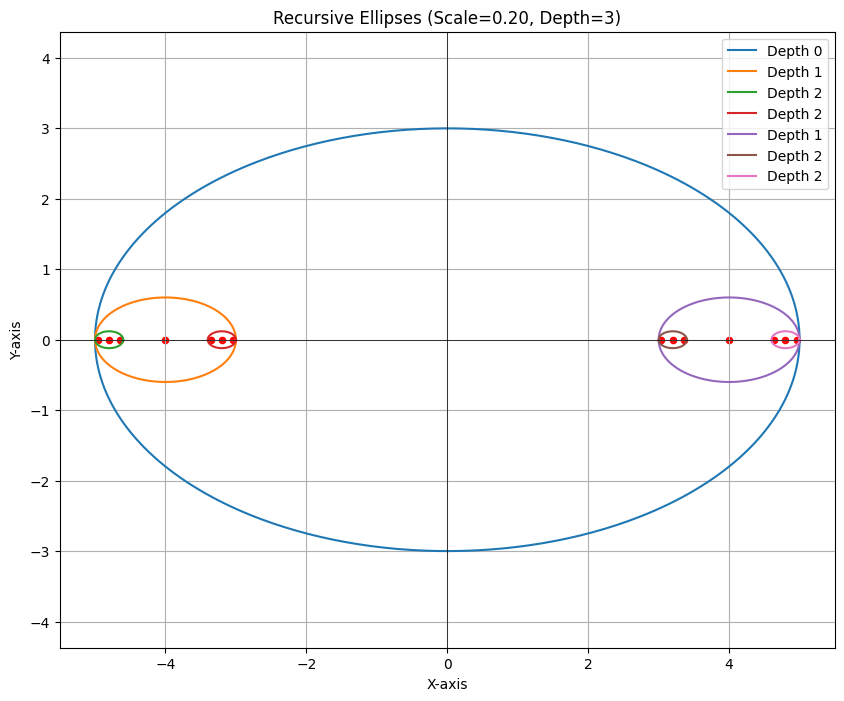

Auto-calculated Scale Factor (K = 1 - c/a): 0.20


In [ ]:
# @title #Scaling to Dual Foci Nested Ellipse Recursion
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive_output, FloatSlider, Button, VBox, HBox, Tab, HTML, IntSlider
from IPython.display import display

def generate_ellipse(center, a, b, theta):
    """Generate (x, y) points for an ellipse."""
    x = center[0] + a * np.cos(theta)
    y = center[1] + b * np.sin(theta)
    return x, y

def calculate_foci(center, a, b):
    """Calculate the foci of an ellipse with center, semi-major axis a, and semi-minor axis b."""
    if a < b:
        raise ValueError("Semi-major axis (a) must be ≥ semi-minor axis (b).")
    c = np.sqrt(a**2 - b**2)
    return (center[0] - c, center[1]), (center[0] + c, center[1])

def plot_ellipses(a, b, scale_factor, recursion_depth):
    """Plot the main ellipse and recursively plot scaled ellipses at the foci."""
    try:
        if a < b:
            raise ValueError("Parameter 'a' must be ≥ parameter 'b'.")

        plt.figure(figsize=(10, 8))

        def recursive_plot(center, a, b, depth):
            if depth == 0:
                return

            theta = np.linspace(0, 2 * np.pi, 500)
            x, y = generate_ellipse(center, a, b, theta)
            plt.plot(x, y, label=f'Depth {recursion_depth - depth}')

            focus1, focus2 = calculate_foci(center, a, b)
            plt.scatter(*focus1, color='red', s=20)
            plt.scatter(*focus2, color='red', s=20)

            new_a = a * scale_factor
            new_b = b * scale_factor
            recursive_plot(focus1, new_a, new_b, depth - 1)
            recursive_plot(focus2, new_a, new_b, depth - 1)

        recursive_plot((0, 0), a, b, recursion_depth)

        plt.title(f'Recursive Ellipses (Scale={scale_factor:.2f}, Depth={recursion_depth})')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.grid(True)
        plt.axis('equal')
        plt.legend()
        plt.show()

        c = np.sqrt(a**2 - b**2)
        auto_scale = 1 - c / a
        print(f"Auto-calculated Scale Factor (K = 1 - c/a): {auto_scale:.2f}")
    except Exception as ex:
        print("Error in plot_ellipses:", str(ex))

def interactive_plot():
    """Create interactive widgets for parameters and auto-scaling."""
    a_slider = FloatSlider(value=5.0, min=1.0, max=10.0, step=0.1, description='Semi-major (a):')
    b_slider = FloatSlider(value=3.0, min=1.0, max=10.0, step=0.1, description='Semi-minor (b):')
    scale_slider = FloatSlider(value=0.6, min=0.1, max=0.9, step=0.01, description='Scale Factor:')
    depth_slider = IntSlider(value=3, min=1, max=5, step=1, description='Recursion Depth:')
    autoscale_btn = Button(description='Auto Scale K')

    def update_scale(_):
        try:
            a_val = a_slider.value
            b_val = b_slider.value
            if a_val < b_val:
                print("Error: a must be ≥ b")
                return
            c_val = np.sqrt(a_val**2 - b_val**2)
            auto_K = 1 - c_val / a_val
            scale_slider.value = auto_K
        except Exception as ex:
            print("Error in autoscale:", str(ex))

    autoscale_btn.on_click(update_scale)

    ui = VBox([a_slider, b_slider, scale_slider, depth_slider, autoscale_btn])
    out = interactive_output(plot_ellipses, {'a': a_slider, 'b': b_slider, 'scale_factor': scale_slider, 'recursion_depth': depth_slider})
    return ui, out

def main():
    """Run the interactive plot."""
    try:
        ui, out = interactive_plot()
        display(ui, out)
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()


In [1]:
# @title #Ellipse Chords

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown, Checkbox, Tab, VBox, HTML as WidgetHTML
from IPython.display import display, HTML

# Define initial ellipse parameters
h, k = 3.5, 0
F1, F2 = (1, 0), (6, 0)

def calculate_ellipse_properties(a, b):
    c = np.sqrt(a**2 - b**2)
    e = np.sqrt(1 - (b**2) / (a**2))
    A = np.pi * a * b
    f = c  # focal distance
    AR = a / b
    l = (b**2) / a
    C = np.pi * (3 * (a + b) - np.sqrt((3 * a + b) * (a + 3 * b)))
    upper_half_length = C / 2
    return c, e, A, f, AR, l, C, upper_half_length

def create_table(data):
    table_html = "<table style='border-collapse: collapse; width: 100%;'>"
    table_html += "<tr><th style='border: 1px solid black; padding: 8px;'>Property</th><th style='border: 1px solid black; padding: 8px;'>Value</th></tr>"
    for key, value in data.items():
        table_html += f"<tr><td style='border: 1px solid black; padding: 8px;'>{key}</td><td style='border: 1px solid black; padding: 8px;'>{value:.5f}</td></tr>"
    table_html += "</table>"
    return table_html

def update_plot(s, a, b, color, show_axes, show_grid):
    plt.clf()  # Clear previous plot output

    c, e, A, f, AR, l, C, upper_half_length = calculate_ellipse_properties(a, b)

    # Calculate point P on the ellipse based on slider position s
    P_x = a * np.cos(np.pi * (1 - s)) + h
    P_y = b * np.sin(np.pi * (1 - s))

    # Calculate chord lengths from P to foci F1 and F2 and their proportions
    CH1 = np.sqrt((P_x - F1[0])**2 + P_y**2)
    CH2 = np.sqrt((P_x - F2[0])**2 + P_y**2)
    total_length = CH1 + CH2
    CH1_proportion = CH1 / total_length * 10
    CH2_proportion = CH2 / total_length * 10

    Arc_Angle = np.pi * s
    Arc_Length = s * upper_half_length

    # Plot the ellipse (shifted by center h) in the selected color
    t = np.linspace(0, 2*np.pi, 100)
    plt.plot(a * np.cos(t) + h, b * np.sin(t), color=color, lw=2)

    # Plot the foci, point P, and the chords
    plt.plot(F1[0], F1[1], 'ro', markersize=5)
    plt.plot(F2[0], F2[1], 'ro', markersize=5)
    plt.plot(P_x, P_y, 'go', markersize=5)
    plt.plot([F1[0], P_x], [F1[1], P_y], 'r', lw=2)
    plt.plot([F2[0], P_x], [F2[1], P_y], 'g', lw=2)

    # Optionally display axes and grid based on widget settings
    if show_axes:
        plt.axhline(0, color='#666666', lw=0.5)
        plt.axvline(0, color='#666666', lw=0.5)
    if show_grid:
        plt.grid(True, alpha=0.3)

    plt.xlim(-4, 15)
    plt.ylim(-9, 12)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Ellipse Visualization (a={a:.2f}, b={b:.2f}, s={s:.2f})')

    # Add text annotations with calculated properties
    plt.text(0, 10, f'Arc Angle: {np.degrees(Arc_Angle):.2f}°', fontsize=10)
    plt.text(0, 9, f'Arc Length: {Arc_Length:.2f}', fontsize=10)
    plt.text(8, 10, f'P: ({P_x:.2f}, {P_y:.2f})', fontsize=10)
    plt.text(8, 9, f'CH1: {CH1:.2f}', fontsize=10)
    plt.text(8, 8, f'CH2: {CH2:.2f}', fontsize=10)
    plt.text(8, 7, f'CH1 + CH2: {CH1+CH2:.2f}', fontsize=10)
    plt.text(8, 6, f'CH1 proportion: {CH1_proportion:.2f}', fontsize=10)
    plt.text(8, 5, f'CH2 proportion: {CH2_proportion:.2f}', fontsize=10)

    # Visual representation of chord proportions
    y_position = -7
    x_start, x_end = 0, 10
    plt.plot([x_start, x_end], [y_position, y_position], 'k-', linewidth=2)
    plt.plot([x_start, x_start + CH1_proportion], [y_position, y_position], 'r-', linewidth=4)
    plt.plot([x_start + CH1_proportion, x_end], [y_position, y_position], 'g-', linewidth=4)

    plt.tight_layout()
    plt.show()

def create_tabs(a, b):
    c, e, A, f, AR, l, C, upper_half_length = calculate_ellipse_properties(a, b)
    tab_contents = [
        WidgetHTML("""
        <h3>How to Use the Visualization</h3>
        <ol>
            <li>Use the sliders to adjust the semi-major axis (a) and semi-minor axis (b) of the ellipse.</li>
            <li>Use the position slider to move point P along the ellipse.</li>
            <li>Observe how the chord lengths (CH1 and CH2) change.</li>
            <li>The red and green lines at the bottom represent the proportions of CH1 and CH2.</li>
            <li>The arc angle and length are displayed above the ellipse.</li>
        </ol>
        <h4>Plot Details:</h4>
        <ul>
            <li>The ellipse is plotted using parametric equations.</li>
            <li>Foci (F1 and F2) are plotted as red dots.</li>
            <li>Point P is plotted as a green dot.</li>
            <li>Chords from P to the foci are plotted as colored lines.</li>
            <li>Text annotations display calculated values for P, CH1, CH2, and their proportions.</li>
            <li>The chord sum representation at the bottom visually shows the proportions of CH1 and CH2.</li>
        </ul>
        """),
        WidgetHTML("""
        <h3>Ellipse Equations and Details</h3>
        <h4>Basic Equations:</h4>
        <ul>
            <li>Cartesian equation: (x-h)²/a² + (y-k)²/b² = 1</li>
            <li>Parametric equations: x = a*cos(t) + h, y = b*sin(t) + k</li>
            <li>Eccentricity: e = √(1 - b²/a²)</li>
            <li>Area: A = π*a*b</li>
            <li>Circumference (approximation): C ≈ π[3(a + b) - √((3a + b)(a + 3b))]</li>
        </ul>
        <h4>Parameter Definitions:</h4>
        <ul>
            <li>a: semi-major axis length</li>
            <li>b: semi-minor axis length</li>
            <li>c: distance from the center to each focus</li>
            <li>h, k: center coordinates</li>
            <li>F1, F2: coordinates of the two foci</li>
        </ul>
        <h4>Table of Equations:</h4>
        <table style="border-collapse: collapse; width: 100%;">
            <tr>
                <th style="border: 1px solid black; padding: 8px;">Name</th>
                <th style="border: 1px solid black; padding: 8px;">Equation</th>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 8px;">Arc Angle</td>
                <td style="border: 1px solid black; padding: 8px;">Arc_Angle = 1 * π * s</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 8px;">s</td>
                <td style="border: 1px solid black; padding: 8px;">s = Arc_Angle / (1 * π)</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 8px;">S</td>
                <td style="border: 1px solid black; padding: 8px;">S = [0, 1]</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 8px;">Length of CH1</td>
                <td style="border: 1px solid black; padding: 8px;">CH1 = √((P_x - F1_x)² + (P_y - F1_y)²)</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 8px;">Length of CH2</td>
                <td style="border: 1px solid black; padding: 8px;">CH2 = √((P_x - F2_x)² + (P_y - F2_y)²)</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 8px;">Proportion of CH1</td>
                <td style="border: 1px solid black; padding: 8px;">CH1 / (CH1 + CH2) * 10</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 8px;">Proportion of CH2</td>
                <td style="border: 1px solid black; padding: 8px;">CH2 / (CH1 + CH2) * 10</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 8px;">Arc Length</td>
                <td style="border: 1px solid black; padding: 8px;">Arc_Length = s * upper_half_length</td>
            </tr>
        </table>
        <h4>Additional Notes:</h4>
        <ul>
            <li>The sum of the distances from any point on the ellipse to the two foci is constant.</li>
            <li>The parameter 's' varies from 0 to 1, representing the position of point P on the ellipse.</li>
            <li>The factor of 1 before π in the Arc Angle equation determines the portion of the ellipse traversed.</li>
            <li>Changing this factor to 2 would make point P traverse the full ellipse as 's' goes from 0 to 1.</li>
        </ul>
        """),
        WidgetHTML(create_table({
            "Semi-major axis (a)": a,
            "Semi-minor axis (b)": b,
            "Eccentricity (e)": e,
            "Area (A)": A,
            "Focal Distance (f)": f,
            "Aspect Ratio (AR)": AR,
            "Semi-latus Rectum (l)": l,
            "Circumference (C)": C
        }))
    ]

    tab = Tab()
    tab.children = [VBox([child]) for child in tab_contents]
    tab.set_title(0, 'Instructions')
    tab.set_title(1, 'Equations and Details')
    tab.set_title(2, 'Ellipse Properties')
    return tab

def main():
    try:
        # Define interactive widgets for position, major axis, minor axis, color, axes, and grid
        s_slider = FloatSlider(min=0, max=1, step=0.01, value=0, description='Position:')
        a_slider = FloatSlider(min=1, max=10, step=0.1, value=5, description='Major axis (a):')
        b_slider = FloatSlider(min=1, max=10, step=0.1, value=4.33, description='Minor axis (b):')
        color_picker = Dropdown(options=['blue', 'green', 'purple', 'orange'], description='Color:')
        axes_check = Checkbox(value=True, description='Show Axes')
        grid_check = Checkbox(value=True, description='Show Grid')

        interact(update_plot, s=s_slider, a=a_slider, b=b_slider, color=color_picker, show_axes=axes_check, show_grid=grid_check)
        tab = create_tabs(a_slider.value, b_slider.value)
        display(tab)
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()


interactive(children=(FloatSlider(value=0.0, description='Position:', max=1.0, step=0.01), FloatSlider(value=5…

In [35]:
# @title #Scale w/ Chords

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown, Checkbox, Tab, VBox, HBox, Button, Output, HTML as WidgetHTML
from IPython.display import display, HTML

# Fixed parent ellipse center and foci will be computed from a, b
h, k = 3.5, 0

def calculate_ellipse_properties(a, b):
    # Ensure valid ellipse dimensions
    if b >= a:
        raise ValueError("Semi-minor axis must be less than semi-major axis.")
    c = np.sqrt(a**2 - b**2)
    e = np.sqrt(1 - (b**2) / (a**2))
    A = np.pi * a * b
    AR = a / b
    l = (b**2) / a
    C = np.pi * (3*(a + b) - np.sqrt((3*a + b)*(a + 3*b)))
    upper_half_length = C / 2
    # Optimal scaling factor for the child ellipse at a focus, derived as: k = 1 - (c/a)
    k_auto = 1 - (c / a)
    return c, e, A, AR, l, C, upper_half_length, k_auto

def create_table(data):
    table_html = "<table style='border-collapse: collapse; width: 100%;'>"
    table_html += "<tr><th style='border: 1px solid black; padding: 8px;'>Property</th>"
    table_html += "<th style='border: 1px solid black; padding: 8px;'>Value</th></tr>"
    for key, value in data.items():
        table_html += f"<tr><td style='border: 1px solid black; padding: 8px;'>{key}</td>"
        table_html += f"<td style='border: 1px solid black; padding: 8px;'>{value:.5f}</td></tr>"
    table_html += "</table>"
    return table_html

def update_plot(s, a, b, color, show_axes, show_grid, scale_factor):
    try:
        c, e, A, AR, l, C, upper_half_length, k_auto = calculate_ellipse_properties(a, b)
    except ValueError as ve:
        print(f"Error: {ve}")
        return
    plt.clf()  # Clear previous plot output

    # Parent ellipse (using parametric equations)
    t = np.linspace(0, 2*np.pi, 300)
    Xp = a * np.cos(t) + h
    Yp = b * np.sin(t) + k
    plt.plot(Xp, Yp, color=color, lw=2, label="Parent Ellipse")

    # Compute parent's foci
    F1 = (h - c, k)
    F2 = (h + c, k)
    plt.plot(F1[0], F1[1], 'ro', markersize=6, label="Foci")
    plt.plot(F2[0], F2[1], 'ro', markersize=6)

    # Plot a moving point P along the parent ellipse using the parameter s
    P_x = a * np.cos(np.pi * (1 - s)) + h
    P_y = b * np.sin(np.pi * (1 - s)) + k
    plt.plot(P_x, P_y, 'go', markersize=6, label="Point P")

    # Optionally plot chords from each focus to P
    plt.plot([F1[0], P_x], [F1[1], P_y], 'r--', lw=1)
    plt.plot([F2[0], P_x], [F2[1], P_y], 'g--', lw=1)

    # Compute child ellipse (recursed ellipse) at focus F1, scaled by scale_factor
    a_child = a * scale_factor
    b_child = b * scale_factor
    t_child = np.linspace(0, 2*np.pi, 300)
    Xc = a_child * np.cos(t_child) + F1[0]
    Yc = b_child * np.sin(t_child) + F1[1]
    plt.plot(Xc, Yc, 'm-', lw=2, label=f"Child Ellipse (k = {scale_factor:.3f})")

    # Optionally, calculate and mark the child ellipse foci for reference (if valid)
    try:
        c_child = np.sqrt(a_child**2 - b_child**2)
    except ValueError:
        c_child = 0
    F1_child = (F1[0] - c_child, k)
    F2_child = (F1[0] + c_child, k)
    plt.plot(F1_child[0], F1_child[1], 'co', markersize=4, label="Child Foci")
    plt.plot(F2_child[0], F2_child[1], 'co', markersize=4)

    # Calculate intersection points of chord F1-P and child ellipse
    P_minus_F1_x = P_x - F1[0]
    P_minus_F1_y = P_y - F1[1]
    denominator = ((P_minus_F1_x) / a_child)**2 + ((P_minus_F1_y) / b_child)**2
    intersection_points = []
    if denominator > 1e-9: # Avoid division by zero and handle cases where P is very close to F1
        t_factor = 1 / np.sqrt(denominator)
        t_values = [t_factor, -t_factor]
        for t in t_values:
            Ix = F1[0] + t * P_minus_F1_x
            Iy = F1[1] + t * P_minus_F1_y
            intersection_points.append((Ix, Iy))

    # Plot intersection points
    if len(intersection_points) == 2:
        Ix1, Iy1 = intersection_points[0]
        Ix2, Iy2 = intersection_points[1]
        plt.plot(Ix1, Iy1, 'yo', markersize=8, label="Intersection 1")
        plt.plot(Ix2, Iy2, 'co', markersize=8, label="Intersection 2") # Changed color for visibility

        # Print coordinates dynamically
        intersection_coords_text = f"Intersection 1: ({Ix1:.2f}, {Iy1:.2f})\nIntersection 2: ({Ix2:.2f}, {Iy2:.2f})"
        plt.gca().text(0.98, 0.02, intersection_coords_text, verticalalignment='bottom', horizontalalignment='right',
                 transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


    # Set plot aesthetics
    if show_axes:
        plt.axhline(0, color='#666666', lw=0.5)
        plt.axvline(0, color='#666666', lw=0.5)
    if show_grid:
        plt.grid(True, alpha=0.3)

    plt.xlim(-4, 15)
    plt.ylim(-9, 12)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Parent Ellipse and Child Ellipse at Foci (s = {s:.2f})')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.15), ncol=2) # Legend higher above plot
    plt.tight_layout(rect=[0,0,1,0.85]) # Adjust layout to make more space for legend
    plt.show()


def create_tabs(a, b):
    try:
        c, e, A, AR, l, C, upper_half_length, k_auto = calculate_ellipse_properties(a, b)
    except Exception as ve:
        k_auto = 0
        c = e = A = AR = l = C = upper_half_length = 0
    tab_contents = [
        WidgetHTML("""
        <h3>Instructions</h3>
        <ol>
        <li>Adjust the sliders for the parent ellipse’s semi-major (a) and semi-minor (b) axes.</li>
        <li>Use the position slider to move a point P along the parent ellipse.</li>
        <li>The parent ellipse (in your chosen color) with its foci is plotted.</li>
        <li>A child ellipse is drawn at one of the foci, scaled by the chosen scaling factor.</li>
        <li>The intersection points of the chord from F1 to P and the child ellipse are plotted and their coordinates are displayed.</li>
        <li>Click the "Auto-Scale" button to set the optimal scaling factor, calculated as k = 1 – c/a.</li>
        </ol>
        """),
        WidgetHTML("""
        <h3>Equations and Details</h3>
        <ul>
        <li>Standard Ellipse: (x-h)²/a² + (y-k)²/b² = 1</li>
        <li>Focal distance: c = √(a² – b²)</li>
        <li>Foci coordinates: (h ± c, k)</li>
        <li>Scaling Factor: k = 1 – (c/a)</li>
        </ul>
        """),
        WidgetHTML(create_table({
            "Semi-major axis (a)": a,
            "Semi-minor axis (b)": b,
            "Focal distance (c)": c,
            "Eccentricity (e)": e,
            "Area (A)": A,
            "Aspect Ratio (AR)": AR,
            "Circumference (C)": C,
            "Optimal Scaling Factor (k)": k_auto
        })),
        WidgetHTML("""
        <h3>Geometric Derivation of Scaling Factor (k)</h3>
        <p>The child ellipse is intended to fit into the parent ellipse at a focus. Geometrically, if the parent ellipse has focal distance c and semi-major axis a, then by placing the child ellipse’s center at a focus, the optimal scaling factor is derived as:</p>
        <p style="text-align: center;">k = 1 – (c / a)</p>
        <ul>
        <li>c = √(a² – b²) ensures that the foci are correctly positioned.</li>
        <li>The subtraction ensures that the child ellipse is suitably smaller than the parent.</li>
        </ul>
        """),
        WidgetHTML("""
        <h3>Parametric Derivation of Scaling Factor (k)</h3>
        <p>When parameterizing the parent ellipse as:</p>
        <p style="text-align: center;">x = a cos(t) + h, y = b sin(t) + k</p>
        <p>and the child (scaled) ellipse as:</p>
        <p style="text-align: center;">x = k·a cos(t) + (h – c), y = k·b sin(t) + k</p>
        <p>Matching the conditions for tangency and overlap leads to the same result:</p>
        <p style="text-align: center;">k = 1 – (c / a)</p>
        """)
    ]

def main():
    try:
        # Interactive widgets for ellipse parameters and controls
        s_slider = FloatSlider(min=0, max=1, step=0.01, value=0, description='Position:')
        a_slider = FloatSlider(min=1, max=10, step=0.1, value=5, description='Major axis (a):')
        b_slider = FloatSlider(min=1, max=10, step=0.1, value=4.33, description='Minor axis (b):')
        color_picker = Dropdown(options=['blue', 'green', 'purple', 'orange'], description='Color:')
        axes_check = Checkbox(value=True, description='Show Axes')
        grid_check = Checkbox(value=True, description='Show Grid')
        scale_slider = FloatSlider(min=0.1, max=1.0, step=0.01, value=0.5, description='Scale Factor:')
        autoscale_btn = Button(description='Auto-Scale', tooltip='Calculate optimal scaling factor')
        autoscale_out = Output()

        # Autoscaling function: computes k = 1 - c/a
        def auto_scale(_):
            with autoscale_out:
                autoscale_out.clear_output()
                try:
                    a_val = a_slider.value
                    b_val = b_slider.value
                    if b_val >= a_val:
                        print("Error: Semi-minor axis must be less than semi-major axis.")
                        return
                    c, _, _, _, _, _, _, k_auto = calculate_ellipse_properties(a_val, b_val)
                    scale_slider.value = k_auto
                    print(f"Auto-scaled k: {k_auto:.3f}")
                except Exception as ex:
                    print(f"Autoscale error: {ex}")

        autoscale_btn.on_click(auto_scale)

        controls = VBox([

            HBox([ autoscale_btn]), autoscale_out
        ])

        display(controls)

        interact(update_plot, s=s_slider, a=a_slider, b=b_slider, color=color_picker,
                 show_axes=axes_check, show_grid=grid_check, scale_factor=scale_slider, __manual=True) # Added __manual=True for clarity

        tabs = create_tabs(a_slider.value, b_slider.value)
         # Display controls explicitly *before* tabs
        display(tabs)


    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

interactive(children=(FloatSlider(value=0.0, description='Position:', max=1.0, step=0.01), FloatSlider(value=5…

None

In [36]:
# @title #Full Visual Analysis
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider, Layout, Dropdown, VBox, HBox
from IPython.display import display, HTML
import colorsys
from graphviz import Digraph
from IPython.display import display, Image

# Binary Tree Classes
class Node:
    def __init__(self, value, position=''):
        self.value = value
        self.position = position
        self.left = None
        self.right = None

class BinaryTree:
    def __init__(self):
        self.root = None

    def create_pyramid(self, levels):
        if levels <= 0:
            return None

        self.root = Node(1, 'Root')
        current_value = 2

        queue = [self.root]
        current_level = 1

        while current_level < levels:
            level_size = len(queue)
            for _ in range(level_size):
                node = queue.pop(0)

                node.left = Node(current_value, f"{node.position}L")
                current_value += 1
                queue.append(node.left)

                node.right = Node(current_value, f"{node.position}R")
                current_value += 1
                queue.append(node.right)

            current_level += 1

    def visualize(self):
        dot = Digraph(comment='Binary Tree')
        dot.attr(rankdir='TB')

        def add_nodes_edges(node):
            if node:
                label = f"{node.value}\n({node.position})"
                dot.node(str(node.value), label,
                         shape='circle',
                         style='filled',
                         fillcolor='lightblue' if node.position == 'Root' else 'lightgray')

                if node.left:
                    dot.edge(str(node.value), str(node.left.value))
                    add_nodes_edges(node.left)
                if node.right:
                    dot.edge(str(node.value), str(node.right.value))
                    add_nodes_edges(node.right)

        add_nodes_edges(self.root)
        return dot

# Ellipse and Plotting Functions
def generate_ellipse(center, a, b, theta):
    x = center[0] + a * np.cos(theta)
    y = center[1] + b * np.sin(theta)
    return x, y

def ellipse_intersection(h, k, a, b, x0, y0, x1, y1):
    A = (x1 - x0)**2 / a**2 + (y1 - y0)**2 / b**2
    B = 2 * ((x1 - x0) * (x0 - h) / a**2 + (y1 - y0) * (y0 - k) / b**2)
    C = (x0 - h)**2 / a**2 + (y0 - k)**2 / b**2 - 1
    t = np.roots([A, B, C])
    points = [(x0 + t[i] * (x1 - x0), y0 + t[i] * (y1 - y0)) for i in range(2)]
    return points

def calculate_tangent_line(center, a, b, P, tangent_length):
    P_x, P_y = P
    center_x, center_y = center
    dx = P_x - center_x
    dy = P_y - center_y
    m = -b**2 * dx / (a**2 * dy)

    # Calculate the distance from the point of tangency to the endpoints
    d = tangent_length / 2

    if np.isinf(m):
        x1, y1 = P_x, P_y - d
        x2, y2 = P_x, P_y + d
    else:
        dx_offset = d / np.sqrt(1 + m**2)
        dy_offset = m * dx_offset
        x1, y1 = P_x - dx_offset, P_y - dy_offset
        x2, y2 = P_x + dx_offset, P_y + dy_offset

    return (x1, y1), (x2, y2)

def generate_color(depth, focus_index, total_depth):
    hue = (depth / total_depth + focus_index * 0.1) % 1.0
    saturation = 0.7
    value = 0.8
    return colorsys.hsv_to_rgb(hue, saturation, value)

def plot_individual_ellipse(ax, ellipse_data):
    center, a, b = ellipse_data['center'], ellipse_data['a'], ellipse_data['b']
    foci, intersection = ellipse_data['foci'], ellipse_data['intersection']
    chords, tangent = ellipse_data['chords'], ellipse_data['tangent']
    depth, color = ellipse_data['depth'], ellipse_data['color']

    theta = np.linspace(0, 2 * np.pi, 100)
    x, y = generate_ellipse(center, a, b, theta)
    ax.plot(x, y, color=color)
    ax.scatter(*foci[0], color='red', zorder=5, label='Focus 1')
    ax.scatter(*foci[1], color='blue', zorder=5, label='Focus 2')
    ax.scatter(*intersection, color='green', zorder=5, label='Intersection')
    for chord in chords:
        ax.plot([chord[0][0], chord[1][0]], [chord[0][1], chord[1][1]], 'k--')
    if tangent:
        ax.plot([tangent[0][0], tangent[1][0]], [tangent[0][1], tangent[1][1]], 'y-', label='Tangent')
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    ax.set_title(f'Ellipse at Depth {depth}')

    info = [
        f"Depth: {depth}",
        f"Center: {center}",
        f"Semi-major axis (a): {a:.4f}",
        f"Semi-minor axis (b): {b:.4f}",
        f"Distance between foci (c): {ellipse_data['c']:.4f}",
        f"Eccentricity: {(ellipse_data['c']/a):.4f}",
        f"Foci: {foci}",
        f"Intersection point: {intersection}",
    ]
    if chords:
        info.extend([f"Chord length {j+1}: {np.linalg.norm(np.array(chord[0]) - np.array(chord[1])):.4f}"
                     for j, chord in enumerate(chords)])
    if tangent:
        info.extend([
            f"Tangent line: from {tangent[0]} to {tangent[1]}",
            f"Tangent slope: {(tangent[1][1]-tangent[0][1])/(tangent[1][0]-tangent[0][0]):.4f}"
        ])
    return '\n'.join(info)

def plot_recursive_ellipses(center_x, center_y, a, c, folds, scale_factor, P_theta, show_tangents, mod_7, show_chords, show_intersection_tangents, tangent_length, auto_scale):
    b = np.sqrt(a**2 - c**2)
    theta = np.linspace(0, 2 * np.pi, 1000)

    all_ellipses = []
    legend_info = []

    fig_main, ax_main = plt.subplots(figsize=(12, 8))

    def recursive_ellipses(center, a, b, depth, parent_intersection=None, focus_index=0):
        if depth > folds:
            return

        # Compute local focal distance for the current ellipse.
        c_local = np.sqrt(a**2 - b**2)
        foci = [(center[0] - c_local, center[1]), (center[0] + c_local, center[1])]
        color = generate_color(depth, focus_index, folds)

        x, y = generate_ellipse(center, a, b, theta)
        ax_main.plot(x, y, color=color, linestyle='--' if depth > 0 else '-',
                     label=f'Ellipse Level {depth}' if depth == 0 else None,
                     alpha=max(0.4, 1 - depth * 0.1))

        if depth == 0:
            P = (center[0] + a * np.cos(P_theta), center[1] + b * np.sin(P_theta))
            ax_main.scatter(*P, color='green', s=100, label='Point P')
            intersection = P
            chords = [(foci[0], P), (foci[1], P)] if show_chords else []
            if show_chords:
                ax_main.plot([foci[0][0], P[0]], [foci[0][1], P[1]], color='purple', linestyle=':', label='Chord PA')
                ax_main.plot([foci[1][0], P[0]], [foci[1][1], P[1]], color='orange', linestyle=':', label='Chord PB')
        else:
            candidates = ellipse_intersection(center[0], center[1], a, b, center[0], center[1], parent_intersection[0], parent_intersection[1])
            intersection = min(candidates, key=lambda point: np.linalg.norm(np.array(point) - np.array(parent_intersection)))
            chords = [(focus, intersection) for focus in foci] if show_chords else []
            if show_chords:
                for focus in foci:
                    ax_main.plot([intersection[0], focus[0]], [intersection[1], focus[1]],
                                 color=color, linestyle='-', alpha=max(0.4, 1 - depth * 0.1))

        ax_main.scatter(*intersection, color='red', marker='x', s=50)

        tangent = None
        if show_intersection_tangents and depth > 0:
            tangent = calculate_tangent_line(center, a, b, intersection, tangent_length)
            ax_main.plot([tangent[0][0], tangent[1][0]], [tangent[0][1], tangent[1][1]], 'g-', alpha=max(0.4, 1 - depth * 0.1))

        ellipse_data = {
            'depth': depth,
            'center': center,
            'a': a,
            'b': b,
            'c': c_local,
            'foci': foci,
            'intersection': intersection,
            'chords': chords,
            'tangent': tangent,
            'color': color
        }
        all_ellipses.append(ellipse_data)

        # Recursive step: compute the scaling factor for child ellipses.
        # In auto scale mode, we compute local_scale = 1 - (c_local / a)
        # In manual mode, we use the reciprocal of the scale_factor slider.
        if auto_scale:
            local_scale = 1 - (c_local / a)
        else:
            local_scale = 1 / scale_factor

        # Use the same factor for both a and b to preserve the ellipse shape.
        a_child = a * local_scale
        b_child = b * local_scale

        for i, focus in enumerate(foci):
            recursive_ellipses(focus, a_child, b_child, depth + 1, intersection, i)

    recursive_ellipses((center_x, center_y), a, b, 0)

    if show_tangents:
        P = all_ellipses[0]['intersection']
        (x1, y1), (x2, y2) = calculate_tangent_line((center_x, center_y), a, b, P, tangent_length)
        ax_main.plot([x1, x2], [y1, y2], 'y-', label='Tangent at P')

    # Plot the foci of the initial ellipse
    ax_main.scatter(*all_ellipses[0]['foci'][0], color='red', s=100, label='Focus 1')
    ax_main.scatter(*all_ellipses[0]['foci'][1], color='blue', s=100, label='Focus 2')

    ax_main.axhline(0, color='black', linewidth=0.5)
    ax_main.axvline(0, color='black', linewidth=0.5)
    ax_main.set_title('Recursive Generation of Ellipses')
    ax_main.set_xlabel('x')
    ax_main.set_ylabel('y')
    ax_main.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    ax_main.grid(True)
    ax_main.set_aspect('equal', adjustable='box')
    plt.show()

    num_ellipses = len(all_ellipses)
    num_cols = 2
    num_rows = num_ellipses
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10 * num_rows))

    for i, ellipse in enumerate(all_ellipses):
        legend_text = plot_individual_ellipse(axs[i, 0], ellipse)
        legend_info.append(legend_text)
        axs[i, 1].axis('off')
        axs[i, 1].text(0, 0.5, legend_text, va='center', ha='left', wrap=True, fontsize=12)

    plt.tight_layout()
    plt.show()

    n = folds
    print(f"\nNumber Patterns:")
    print(f"Number of ellipses: {2**(n+1) - 1}")
    print(f"Ramanujan-Nagell equation: 2^{n} - 7 = {2**n - 7}")
    print(f"Modulo 7 arithmetic: {2**(n-1) * (2**n + n**2) % 7}")

    print("\nLegend Information for All Ellipses:")
    for info in legend_info:
        print(info)
        print("-" * 80)

# Interactive widgets
center_x_slider = FloatSlider(value=3.5, min=-10, max=10, step=0.01, description='Center X:')
center_y_slider = FloatSlider(value=0.0, min=-10, max=10, step=0.01, description='Center Y:')
a_slider = FloatSlider(value=4.0, min=0.1, max=10, step=0.01, description='Semi-major axis (a):')
c_slider = FloatSlider(value=2.5, min=0.1, max=10, step=0.01, description='Foci distance (c):')
folds_slider = IntSlider(value=3, min=0, max=7, step=1, description='Recursion levels:')
# Note: In manual mode the manual scale factor is used; in auto mode this slider is ignored.
scale_factor_slider = FloatSlider(value=2.666666666, min=1.1, max=5, step=0.001, description='Scale factor (manual):')
P_theta_slider = FloatSlider(value=np.pi/4, min=0, max=2*np.pi, step=0.001, description='Point P angle:')
show_tangents_dd = Dropdown(options=[('No', False), ('Yes', True)], value=False, description='Show tangent at P:')
show_intersection_tangents_dd = Dropdown(options=[('No', False), ('Yes', True)], value=False, description='Show intersection tangents:')
mod_7_dropdown = Dropdown(options=[('No', False), ('Yes', True)], value=False, description='Modulo 7 coloring:')
show_chords_dd = Dropdown(options=[('No', False), ('Yes', True)], value=True, description='Show chords:')
tangent_length_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Tangent length:')
# New Auto Scaling widget: when auto scaling is True, the code will compute scaling factor K automatically.
auto_scale_dd = Dropdown(options=[('Manual', False), ('Auto', True)], value=True, description='Auto Scaling:')

def update_plot(center_x, center_y, a, c, folds, scale_factor, P_theta, show_tangents, mod_7, show_chords, show_intersection_tangents, tangent_length, auto_scale):
    if c >= a:
        print("Error: 'c' must be less than 'a' for a valid ellipse.")
        return
    tree = BinaryTree()
    tree.create_pyramid(folds + 1)
    dot = tree.visualize()
    display(Image(dot.pipe(format='png')))
    plot_recursive_ellipses(center_x, center_y, a, c, folds, scale_factor, P_theta, show_tangents, mod_7, show_chords, show_intersection_tangents, tangent_length, auto_scale)

interactive_plot = interactive(update_plot,
                               center_x=center_x_slider, center_y=center_y_slider,
                               a=a_slider, c=c_slider,
                               folds=folds_slider, scale_factor=scale_factor_slider,
                               P_theta=P_theta_slider, show_tangents=show_tangents_dd,
                               mod_7=mod_7_dropdown, show_chords=show_chords_dd,
                               show_intersection_tangents=show_intersection_tangents_dd,
                               tangent_length=tangent_length_slider,
                               auto_scale=auto_scale_dd)

center_box = VBox([center_x_slider, center_y_slider, a_slider, c_slider])
ellipse_box = VBox([folds_slider, scale_factor_slider, P_theta_slider])
options_box = VBox([show_chords_dd, show_tangents_dd, tangent_length_slider, show_intersection_tangents_dd, auto_scale_dd])

layout = VBox([
    HBox([center_box, ellipse_box, options_box]),
    interactive_plot.children[-1]
])

display(layout)
